In [1]:
import sys; print('Python \t\t{0[0]}.{0[1]}'.format(sys.version_info))
import tensorflow as tf; print('Tensorflow \t{}'.format(tf.__version__))
import keras; print('Keras \t\t{}'.format(keras.__version__))

Python 		3.6
Tensorflow 	1.0.0


Using TensorFlow backend.


Keras 		2.0.3


In [2]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("../mnist-data/", one_hot=True)

Extracting ../mnist-data/train-images-idx3-ubyte.gz
Extracting ../mnist-data/train-labels-idx1-ubyte.gz
Extracting ../mnist-data/t10k-images-idx3-ubyte.gz
Extracting ../mnist-data/t10k-labels-idx1-ubyte.gz


In [4]:
mnist.train.images.shape

(55000, 784)

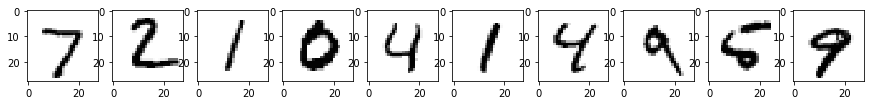

In [5]:
plt.figure(figsize=(15,5))
for i in list(range(10)):
    plt.subplot(1, 10, i+1)
    pixels = mnist.test.images[i]
    pixels = pixels.reshape((28, 28))
    plt.imshow(pixels, cmap='gray_r')
plt.show()

In [6]:
from keras.models import Model
from keras.layers import Input, Dense, Activation
from keras.layers import Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import BatchNormalization

In [7]:
def mlp(batch_normalization=False, activation='sigmoid'):
    _in = Input(shape=(784,))
    
    for i in range(5):
        x = Dense(128, activation=activation, input_shape=(784,))(x if i else _in)
        if batch_normalization:
            x = BatchNormalization()(x)

    _out = Dense(10, activation='softmax')(x)
    model = Model(_in, _out)

    return model

In [8]:
from  functools import reduce

def print_layers(model):
    for l in model.layers:
        print(l.name, l.output_shape, [reduce(lambda x, y: x*y, w.shape) for w in l.get_weights()])

In [9]:
from keras.callbacks import Callback

class BatchLogger(Callback):
    def on_train_begin(self, epoch, logs={}):
        self.log_values = {}
        for k in self.params['metrics']:
            self.log_values[k] = []

    def on_batch_end(self, batch, logs={}):
        for k in self.params['metrics']:
            if k in logs:
                self.log_values[k].append(logs[k])

### Sigmoid activation function

In [10]:
# see http://cs231n.github.io/neural-networks-3/

model = mlp(False, 'sigmoid')
print_layers(model)

bl_noBN = BatchLogger()

from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=["accuracy"])

model.fit(mnist.train.images, mnist.train.labels,
          batch_size=128, epochs=1, verbose=1, callbacks=[bl_noBN],
          validation_data=(mnist.test.images, mnist.test.labels))

input_1 (None, 784) []
dense_1 (None, 128) [100352, 128]
dense_2 (None, 128) [16384, 128]
dense_3 (None, 128) [16384, 128]
dense_4 (None, 128) [16384, 128]
dense_5 (None, 128) [16384, 128]
dense_6 (None, 10) [1280, 10]
Train on 55000 samples, validate on 10000 samples
Epoch 1/1
55000/55000 [==============================] - 2s - loss: 1.1213 - acc: 0.6402 - val_loss: 0.3869 - val_acc: 0.8936


In [11]:
# see http://cs231n.github.io/neural-networks-3/

model = mlp(True, 'sigmoid')
print_layers(model)

bl_BN = BatchLogger()

from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=["accuracy"])

model.fit(mnist.train.images, mnist.train.labels,
          batch_size=128, epochs=1, verbose=1, callbacks=[bl_BN],
          validation_data=(mnist.test.images, mnist.test.labels))

input_2 (None, 784) []
dense_7 (None, 128) [100352, 128]
batch_normalization_1 (None, 128) [128, 128, 128, 128]
dense_8 (None, 128) [16384, 128]
batch_normalization_2 (None, 128) [128, 128, 128, 128]
dense_9 (None, 128) [16384, 128]
batch_normalization_3 (None, 128) [128, 128, 128, 128]
dense_10 (None, 128) [16384, 128]
batch_normalization_4 (None, 128) [128, 128, 128, 128]
dense_11 (None, 128) [16384, 128]
batch_normalization_5 (None, 128) [128, 128, 128, 128]
dense_12 (None, 10) [1280, 10]


/opt/local/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  del sys.path[0]


Train on 55000 samples, validate on 10000 samples
Epoch 1/1
55000/55000 [==============================] - 6s - loss: 0.3140 - acc: 0.9042 - val_loss: 0.2629 - val_acc: 0.9284


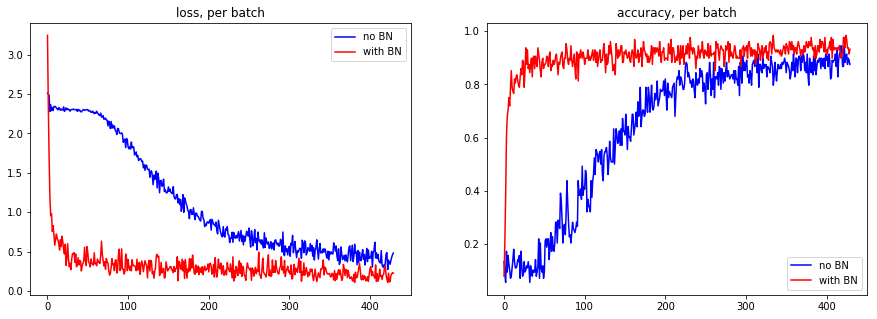

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('loss, per batch')
plt.plot(bl_noBN.log_values['loss'], 'b-', label='no BN');
plt.plot(bl_BN.log_values['loss'], 'r-', label='with BN');
plt.legend(loc='upper right')
plt.subplot(1, 2, 2)
plt.title('accuracy, per batch')
plt.plot(bl_noBN.log_values['acc'], 'b-', label='no BN');
plt.plot(bl_BN.log_values['acc'], 'r-', label='with BN');
plt.legend(loc='lower right')
plt.show()

### Relu activation function

In [13]:
# see http://cs231n.github.io/neural-networks-3/

model = mlp(False, 'relu')
print_layers(model)

bl_noBN = BatchLogger()

from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=["accuracy"])

model.fit(mnist.train.images, mnist.train.labels,
          batch_size=128, epochs=1, verbose=1, callbacks=[bl_noBN],
          validation_data=(mnist.test.images, mnist.test.labels))

input_3 (None, 784) []
dense_13 (None, 128) [100352, 128]
dense_14 (None, 128) [16384, 128]
dense_15 (None, 128) [16384, 128]
dense_16 (None, 128) [16384, 128]
dense_17 (None, 128) [16384, 128]
dense_18 (None, 10) [1280, 10]


/opt/local/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  del sys.path[0]


Train on 55000 samples, validate on 10000 samples
Epoch 1/1
55000/55000 [==============================] - 2s - loss: 0.3187 - acc: 0.9047 - val_loss: 0.1443 - val_acc: 0.9555


In [14]:
# see http://cs231n.github.io/neural-networks-3/

model = mlp(True, 'relu')
print_layers(model)

bl_BN = BatchLogger()

from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=["accuracy"])

model.fit(mnist.train.images, mnist.train.labels,
          batch_size=128, epochs=1, verbose=1, callbacks=[bl_BN],
          validation_data=(mnist.test.images, mnist.test.labels))

input_4 (None, 784) []
dense_19 (None, 128) [100352, 128]
batch_normalization_6 (None, 128) [128, 128, 128, 128]
dense_20 (None, 128) [16384, 128]
batch_normalization_7 (None, 128) [128, 128, 128, 128]
dense_21 (None, 128) [16384, 128]
batch_normalization_8 (None, 128) [128, 128, 128, 128]
dense_22 (None, 128) [16384, 128]
batch_normalization_9 (None, 128) [128, 128, 128, 128]
dense_23 (None, 128) [16384, 128]
batch_normalization_10 (None, 128) [128, 128, 128, 128]
dense_24 (None, 10) [1280, 10]
Train on 55000 samples, validate on 10000 samples
Epoch 1/1
55000/55000 [==============================] - 6s - loss: 0.2868 - acc: 0.9118 - val_loss: 0.1287 - val_acc: 0.9604


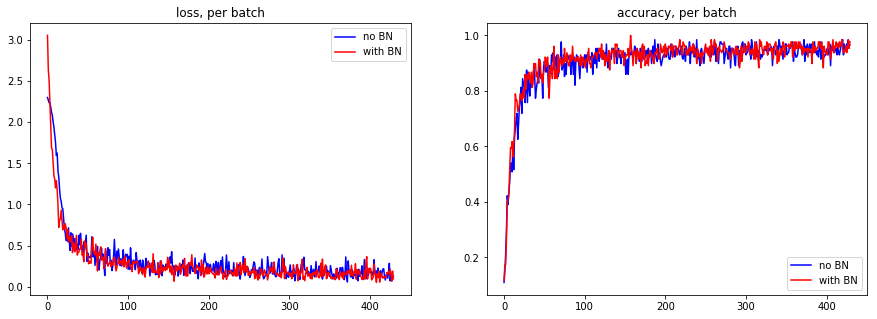

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('loss, per batch')
plt.plot(bl_noBN.log_values['loss'], 'b-', label='no BN');
plt.plot(bl_BN.log_values['loss'], 'r-', label='with BN');
plt.legend(loc='upper right')
plt.subplot(1, 2, 2)
plt.title('accuracy, per batch')
plt.plot(bl_noBN.log_values['acc'], 'b-', label='no BN');
plt.plot(bl_BN.log_values['acc'], 'r-', label='with BN');
plt.legend(loc='lower right')
plt.show()